In [2]:
#Automated reloading of custom modules
%load_ext autoreload
%autoreload 2

In [3]:
#Standard modules
import os
import time
from datetime import datetime
import random

# Data processing
import numpy as np
import scipy
from sklearn.datasets import make_moons, make_circles

# AI
import torch
import torch.nn as nn
from torch.utils.data import random_split, DataLoader, Dataset
import torch.nn.functional as F

# Visualization
import matplotlib
import matplotlib.pyplot as plt

#Custom modules
import helpers as hlp
import models as mdl
from run import run_shadow_learning, run_fedavg

In [5]:
SEED = 0

In [ ]:
pt_normal = run_shadow_learning(n_clients=2, task="MNIST", reg_coeff=1, generator="normal", n_rand=100, reg_loss="MSE", 
                    alpha=10, rounds=100, batch_size=32, topology="fc", epoch_per_round=1, 
                    sizes=None, reduced="small", track_history=True, seed=SEED)

Device:  cpu
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (2000, 1, 28, 28)
	- Validation (500, 1, 28, 28)
Round 38/100 done.          

In [15]:
pt_indep = run_shadow_learning(n_clients=2, task="MNIST", reg_coeff=0,
                    alpha=10, rounds=100, batch_size=32 , epoch_per_round=1, 
                    sizes=None, reduced="small", track_history=True, seed=SEED)

** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (2000, 1, 28, 28)
	- Validation (500, 1, 28, 28)
Round 100/100 done.          
Total time: 237.8s


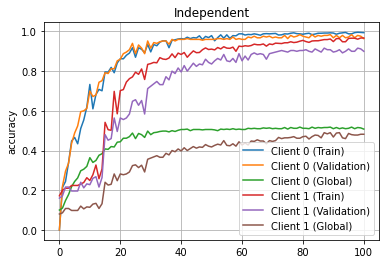

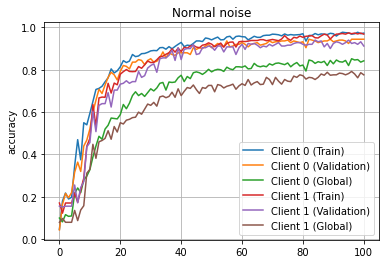

In [14]:

#hlp.plot_global_training_history(pt_dead_leaves, metric="accuracy", title="Dead leaves")

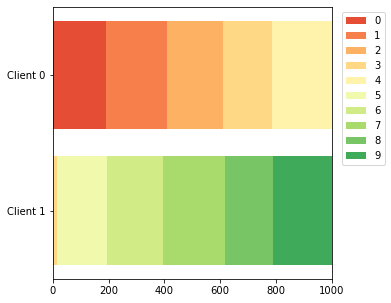

In [11]:
hlp.visualize_class_dist([pt.dl_dict["Train"].dataset for pt in pt_indep], 10)

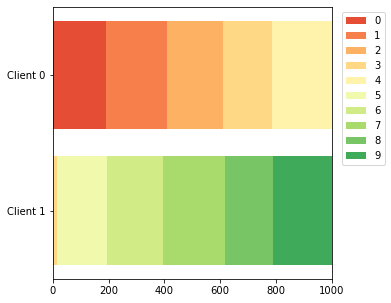

In [12]:
hlp.visualize_class_dist([pt.dl_dict["Train"].dataset for pt in pt_normal], 10)